In [2]:
### ECOUTER VIDEO

# Pattern Recognition 2 - Feature Space

**Objectives**

* Compute distances between objects in feature space
* Use PCA to perform reduce the dimensionality of the problem
* Implement face recognition using [Eigenfaces](http://en.wikipedia.org/wiki/Eigenface)

## Feature space distance

The `ocr_features.npy` file contains extracted features for each letter from the document used in the previous lab, and the `ocr_class.npy` file contains the character corresponding to these features.

The 18 features, extracted with the `regionprops` methods from `scikit-image` are, in order: 

> area, convex area, eccentricity, equivalent diameter, extent, filled area, intertia tensor eigenvalue 1, inertia tensor eigenvalue 2, major axis length, minor axis length, Hu moment 1, Hu moment 2, Hu moment 3, Hu moment 4, Hu moment 5, Hu moment 6, perimeter, solidity

* Create a method which computes the Euclidian distance, in feature space, between two objects.
* Check if the "nearest" object is of the same class.
* What can you do to improve this "distance-based" classification? 

In [3]:
print(ocr_class)

['i' 'u' 'i' ... 'u' 'a' 's']


In [1]:
import numpy as np

ocr_features = np.load('ocr_features.npy')

ocr_class = np.load('ocr_class.npy')

print(ocr_features.shape)
print(np.unique(ocr_class))



(2392, 18)
['0' '1' '4' '5' 'A' 'B' 'C' 'D' 'F' 'G' 'I' 'L' 'M' 'N' 'O' 'R' 'S' 'T'
 'W' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [11]:
### IDEE : les mêmes caractères (lettres) devrient se regrouper ensemble dans le feature space et comme ça on peut les distinguer.

In [2]:
import numpy as np

# Function to calculate Euclidean distance. ## A and B are vector of features et donc différence d'élement par élément
def euclidian(A, B):
    return np.sqrt(((A - B) ** 2).sum())

# Brute-force nearest neighbor search (loop version)
best_matches = []
for i in range(ocr_features.shape[0]):
    best_match = -1
    best_d = 100000000
    for j in range(ocr_features.shape[0]):
        if i == j:
            continue
        d = euclidian(ocr_features[i], ocr_features[j])
        if d < best_d:
            best_match = j
            best_d = d
    best_matches.append((i, ocr_class[i], best_match, ocr_class[best_match], best_d))

# Accuracy calculation
best_matches = np.array(best_matches)
acc = (best_matches[:, 1] == best_matches[:, 3]).sum() / best_matches.shape[0]
print(acc) # good result 

0.899247491638796


In [6]:
## Confond u et n, parce que par exemple roation invariant avec Hu donc logique que ça confond. a et e aussi p/e ou l et 1, ... donc logique les erreurs de l'algo.
for matches in best_matches:
    if matches[1] != matches[3]:
        print(matches[1], matches[3])

u n
h w
l 1
a e
F h
L T
l 1
e c
y f
t i
v a
a e
a s
W N
r s
b d
d b
n u
u n
b d
u n
v a
b d
1 l
n u
a s
r i
p d
c e
A w
b d
l 1
n u
b d
u n
R m
a v
u n
M N
L T
l 1
d p
a e
F S
a 4
b d
e c
0 d
5 y
n u
c a
d b
n u
T F
S F
b d
p d
u n
r t
F S
b d
F L
d b
S F
g F
c e
5 c
S F
1 l
n u
b d
u n
u n
n u
o n
h w
a e
p d
d b
v a
4 a
e c
S F
t i
5 e
l 1
b d
I f
a e
u n
f e
d b
r t
p q
d b
T S
d b
F S
e c
s e
n u
n u
k h
F S
e a
1 l
e c
h b
a s
n u
u n
l 1
S F
n u
n u
S F
k 5
n u
k h
n u
n u
n u
I f
e c
a e
a e
n u
t r
x a
a e
1 l
T L
u n
S F
F g
1 l
u n
u n
n u
L F
u n
b h
n u
n u
d p
1 l
d b
n u
T F
t i
n u
a s
d b
n u
n o
F S
u n
u n
1 l
u n
A S
5 h
b d
d p
n u
b d
e 5
n u
e s
v r
c e
s c
p q
e c
1 l
x u
y 5
n u
u n
u n
d b
t i
a s
u n
b d
l 1
h b
S F
n u
e s
t o
e n
n u
u e
p d
o t
e a
e a
t 5
f t
m S
d b
x z
k F
u n
b h
e s
a c
u e
n u
1 l
1 l
n u
e c
d b
u n
n u
q p
n u
u n
F g
f I
p d
b d
a e
D O
d b
d h
d p
n u
F S
x c
4 a
b d
a e
t i
a e
s a
a e
e f
u n


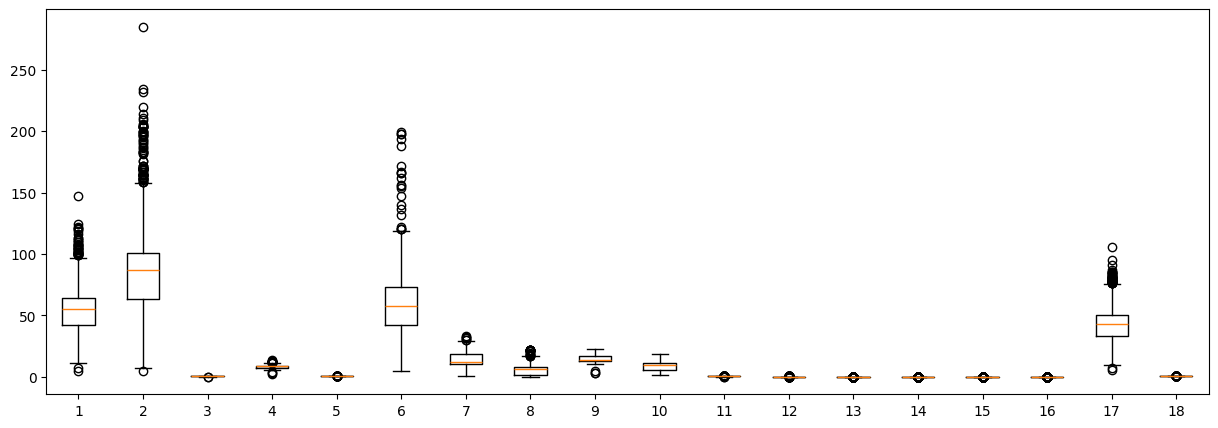

In [7]:
# Quel est le problème le plus gros qu'on a en utilisant cette méthode, que pourrions nous faire pour améliorer ça ?

#Les features ne sont pas standardisés càd que certaines features contribuent bcp trop par rapport à d'autre, comme montré dans le boxplot en bas 
#certaines vont de 0 à 1 et d'autres à 100, donc les 100 ont bcp plus de poids. il faut normaliser.

%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 5))
plt.boxplot(ocr_features)
plt.show()


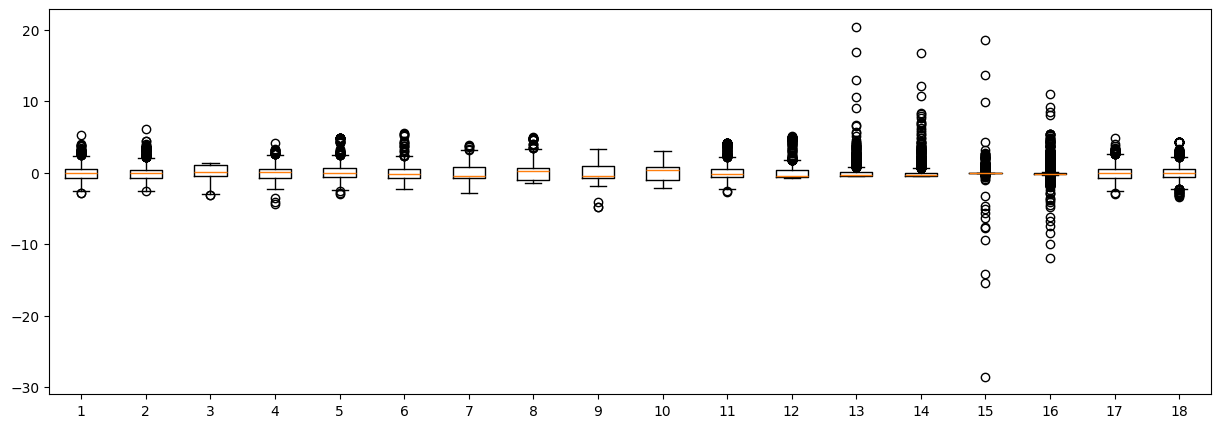

In [9]:
ocr_features = (ocr_features - ocr_features.mean(axis=0)) / ocr_features.std(axis=0)
plt.figure(figsize=(15, 5))
plt.boxplot(ocr_features)
plt.show()

In [11]:
# Optimized vectorized version (même code mais plus rapide, ce qui change c'est les ocr features, la standardization)
best_matches = []
for i in range(ocr_features.shape[0]):
    distances = np.sqrt(((ocr_features - ocr_features[i]) ** 2).sum(axis=1))
    distances[i] = distances.max()  # To ignore self-distance
    best_match = distances.argmin()
    best_matches.append((i, ocr_class[i], best_match, ocr_class[best_match], distances.min()))


# Accuracy calculation
best_matches = np.array(best_matches)
acc = (best_matches[:, 1] == best_matches[:, 3]).sum() / best_matches.shape[0]
print(acc) # good result 

0.9544314381270903


In [13]:
# DONC BIEN REGARDER TYPE, range of the data, ... et voir si on peut faire ensuite du prceossing pour améliorer.

#Bon machine learning est bcp plus robuste, on a pas fait de testing, ... donc bien faire attention, icic c'est juste pour montrer une méthode inutuive.
#avec idée d'extraire infos meaningful.

In [14]:
for matches in best_matches:
    if matches[1] != matches[3]:
        print(matches[1], matches[3])

u n
h b
l 1
u n
t i
d b
a e
a e
W R
d b
n u
u n
b d
u n
b d
1 l
b d
u n
I l
d b
R m
u n
n u
M W
a e
0 R
d b
p d
u n
a e
u n
d b
n u
t i
5 f
1 l
n u
u n
n u
p h
t i
5 e
l 1
I f
u n
n u
k h
n u
a s
u n
n u
k d
k h
d b
n u
I l
u n
i t
a e
a e
u n
u n
u n
L f
b h
n u
n u
1 l
n u
a e
n u
u n
1 l
d h
e t
d b
I 1
u n
u n
u n
u n
b d
b d
u n
t o
p d
o t
t e
f t
b h
u n
1 l
n u
u n
q d
F h
p d
b d
a e
D O
d b
a v
b d
u n
a e
a v
s a
a e
e f


In [15]:
#Mistake principale mtn c'est rotation invariant.

## Eigenfaces

The `faces.npy` file contains a 3D matrix containing 2963 images, each with 170x200 pixels, encoded in 8-bit grayscale.

##### NB INTRO A 23min bien revoir vidéo
use the feature space and use it to find the d'où prvient la variation dans le jeu de données.

In [20]:
from matplotlib import pyplot as plt
%matplotlib notebook

faces = np.load('faces.npy')
print(faces.shape, faces.dtype, faces.min(), faces.max())

# Puis le réenregistrer proprement (format Python 3)
np.save("faces_clean.npy", faces)

C:\Users\pc\AppData\Local\Temp\ipykernel_17984\61985573.py:4: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  faces = np.load('faces.npy')


(2963, 200, 170) uint8 0 255


In [21]:
faces = np.load("faces_clean.npy")

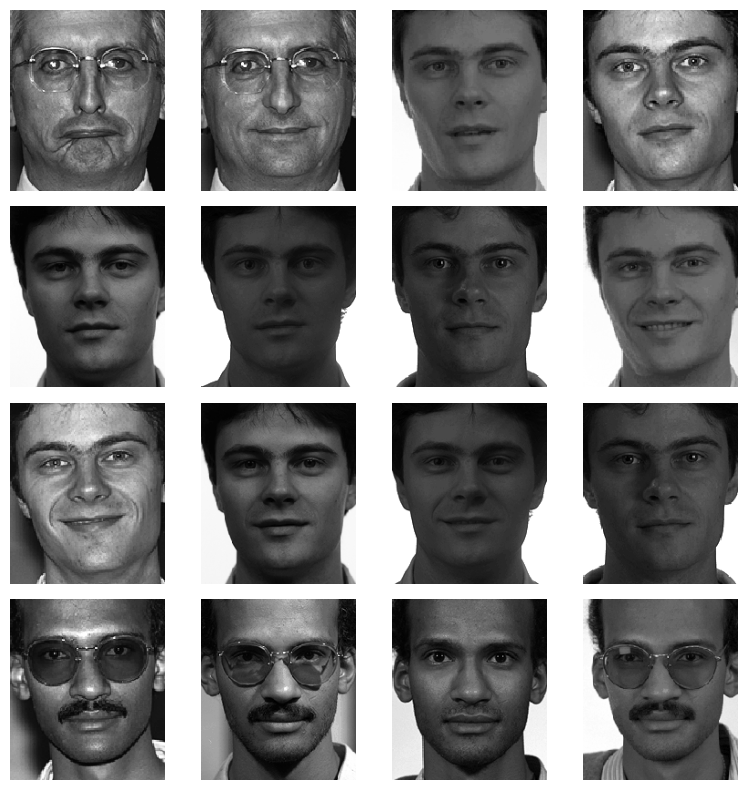

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

# Affiche quelques visages
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(faces[i], cmap=plt.cm.gray)
    plt.axis('off')
plt.tight_layout()
plt.show()


### Direct approach

1. Write a program that subsample the images (e.g. by 5), converts 2D images into lines, and collect all these lines into one single matrix **T**.
1. Zero-center **T** by removing the "mean image" ($T_i \leftarrow T_i - T_{mean}$)
1. Compute the variance/covariance matrix of **T**:
$$ \mathbf{S} = \mathbf{T^TT}$$
1. Compute the eigenvalues $\lambda_i$ and eigenvectors $\mathbf{v}_i$ of **S**
$$\mathbf{Sv}_i = \mathbf{T^T}\mathbf{Tv}_i = \lambda_i \mathbf{v}_i$$
1. The eigenvectors have the same size as the images, and are often referred to as "eigenfaces". Display some of them.

In [ ]:
# Example of eigen value extraction
import numpy as np
from numpy import linalg as LA

w,v = LA.eig(np.diag((1, 2, 3)))
print(w,v)

In [ ]:
# Example of subsampling
im = faces[0]
plt.figure()
plt.subplot(1,2,1)
plt.imshow(im, cmap=plt.cm.gray)
plt.title("Original image")
plt.subplot(1,2,2)
plt.imshow(im[::5,::5], cmap=plt.cm.gray)
plt.title("Subsampled image")
plt.show()

(2963, 1360)
(1360,)


<Figure size 640x480 with 0 Axes>

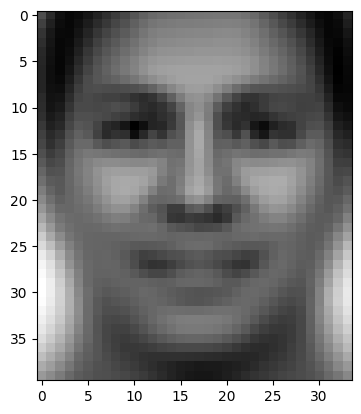

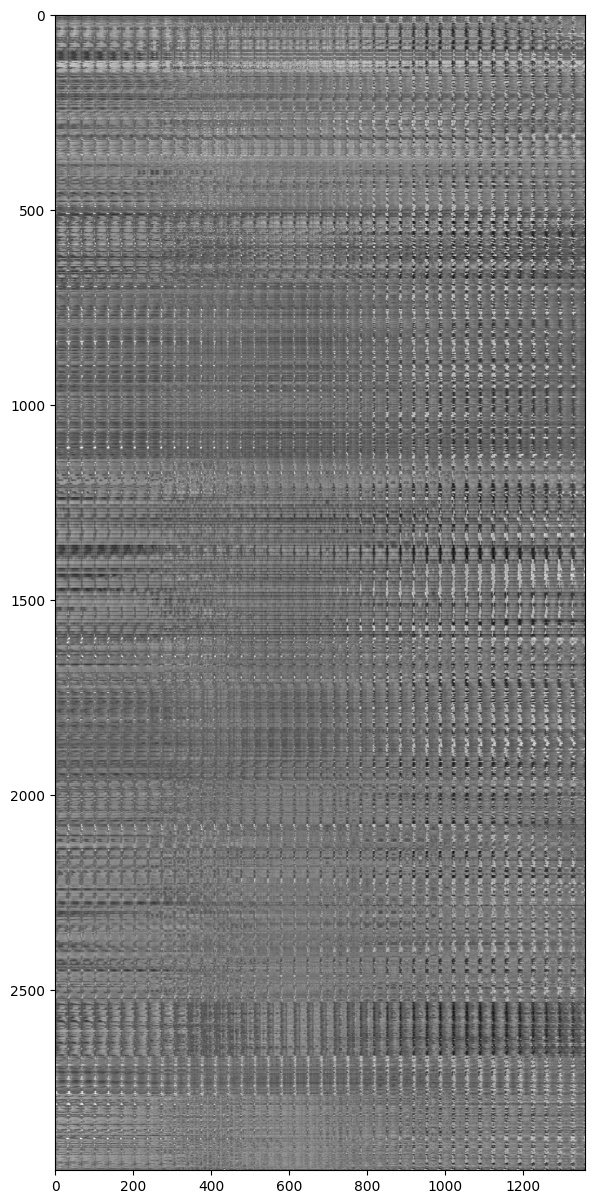

[ 6.53133377e-14  8.69917256e-14 -2.05273230e-14 ...  6.32414209e-14
  4.25798070e-14 -9.09628993e-14]


In [24]:

T = np.array([face[::5, ::5].flatten() for face in faces])
print(T.shape)

plt.gray()

im_mean = T.mean(axis=0)
print(im_mean.shape)

T = T - im_mean

plt.figure()
plt.imshow(im_mean.reshape((200 // 5, 170 // 5)))
plt.show()

plt.figure(figsize=(10, 15))
plt.imshow(T)
plt.show()

print(T.mean(axis=0))


(1360, 1360)
(1360,) (1360, 1360)


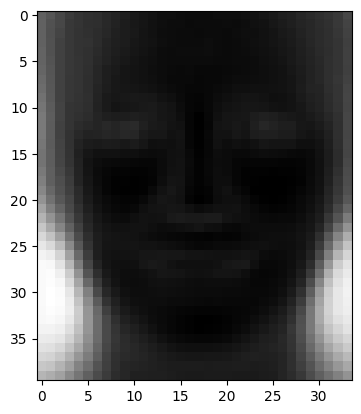

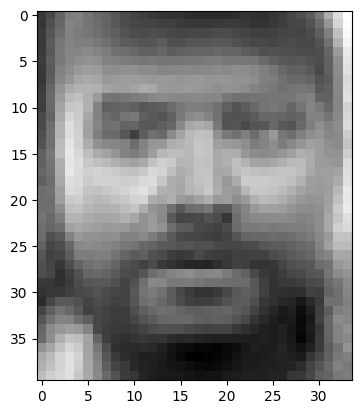

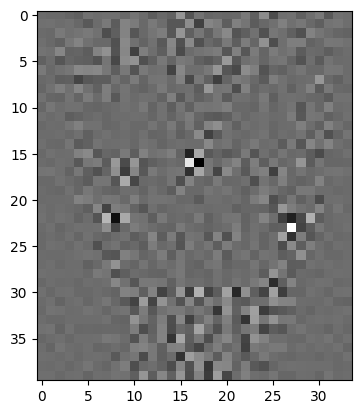

In [28]:
import numpy.linalg as LA

# Matrice de covariance (ou produit scalaire) : S = T.T @ T
S = np.dot(T.T, T)
print(S.shape)  # (1360, 1360)

# Valeurs et vecteurs propres
w, v = LA.eig(S)
print(w.shape, v.shape)  # (1360,), (1360, 1360)

order = w.argsort()[::-1]
w = w[order]
v = v[:, order]


# Affichage du 1er vecteur propre comme image
plt.figure()
plt.imshow(v[:, 0].reshape((40, 34)), cmap='gray')
plt.show()


# Affichage du 1er vecteur propre comme image
plt.figure()
plt.imshow(v[:, 10].reshape((40, 34)), cmap='gray')
plt.show()

# Affichage du 5e vecteur àpd de la fin (few information)
plt.figure()
plt.imshow(v[:, -5].reshape((40, 34)), cmap='gray')
plt.show()

### Compression

1. Reconstruct images using only the first N eigenfaces (e.g. N=100).
2. Compare (visually) reconstructed images with original images

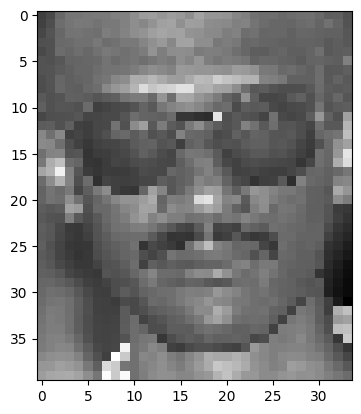

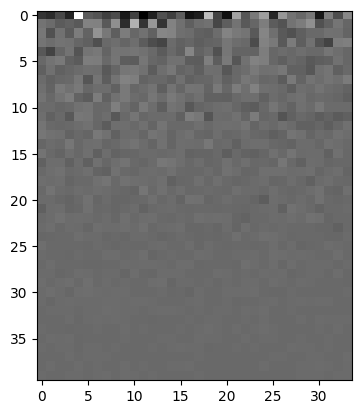

In [29]:
def encode(im):
    return np.dot(im, v)

face = T[12]
encoded = encode(face)

plt.figure()
plt.imshow(face.reshape((40, 34)), cmap='gray')

plt.figure()
plt.imshow(encoded.reshape((40, 34)), cmap='gray')
plt.show()


In [32]:
# Calcul de la variance expliquée pour chaque composante
explained_variance = w / w.sum()

# Trouver combien de composantes suffisent à expliquer > 90% de la variance
for i in range(len(explained_variance)):
    if explained_variance[:i].sum() > 0.9:
        print(i, explained_variance[:i].sum())
        break

# Pour > 95% de la variance
for i in range(len(explained_variance)):
    if explained_variance[:i].sum() > 0.95:
        print(i, explained_variance[:i].sum())
        break


109 0.9004433563654014
248 0.9502026266840314


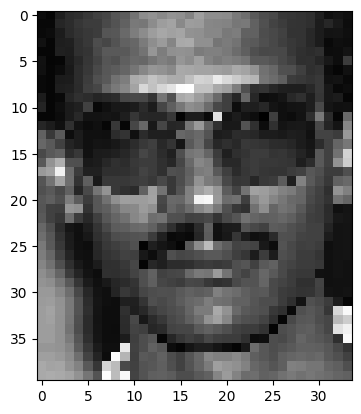

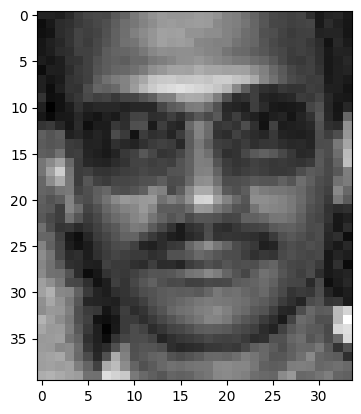

In [33]:
def encode(im, n):
    return np.dot(im, v[:, :n])

def decode(encoded, n):
    return np.dot(encoded, v[:, :n].T)

face = T[12]
N = 248  # Nombre de composantes principales utilisées, changer les valeurs, au plus c'est bas, au moins la reconstruction sera précise

encoded = encode(face, N)
decoded = decode(encoded, N)

# Affichage du visage original
plt.figure()
plt.imshow((face + im_mean).reshape((40, 34)), cmap='gray')

# Affichage de la reconstruction
plt.figure()
plt.imshow((decoded + im_mean).reshape((40, 34)), cmap='gray')
plt.show()


### Face recognition

1. Using the simplified vector space (e.g. 100 first eigenfaces), compute the euclidian distance between one face and the others.
2. For a subset of the image of the database, find the 4 closest matches.

In [34]:

# Nombre de composantes utilisées pour l'encodage
N = 250
T_weights = np.array([encode(face, N) for face in T])
print(T_weights.shape)  # (2963, 250)


(2963, 250)


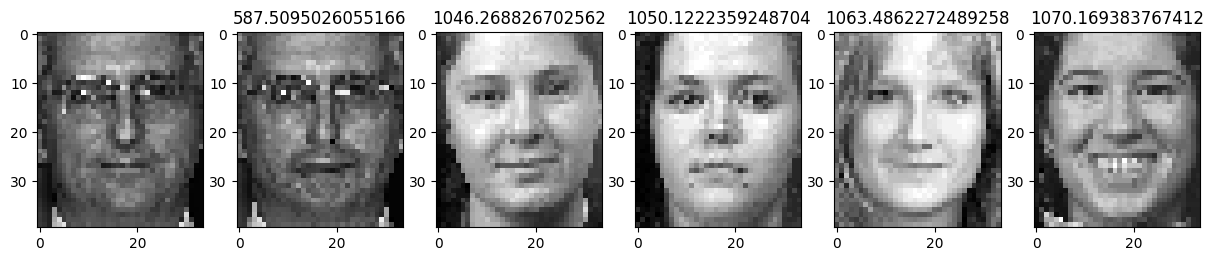

In [39]:
face_id = 1 ##esayer d'autres

# Calcul des distances euclidiennes dans l’espace des poids (T_weights)
distances = np.sqrt(((T_weights - T_weights[face_id]) ** 2).sum(axis=1))
distances[face_id] = distances.max()  # On ignore soi-même
best_matches = np.argsort(distances)  # On trie du plus proche au plus éloigné

# Affichage du visage cible + 4 plus proches correspondants
plt.figure(figsize=(15, 5))
plt.subplot(1, 6, 1)
plt.imshow((im_mean + T[face_id]).reshape((40, 34)), cmap='gray')

# Affiche les 4 visages les plus proches
for i in range(5):
    plt.subplot(1, 6, i + 2)
    plt.imshow((im_mean + T[best_matches[i]]).reshape((40, 34)), cmap='gray')
    plt.title(distances[best_matches[i]])
plt.show()


In [ ]:
## NB : dataset assez simple, tête allignée, ... et on voit que ça marche assez bien. et ça match face avec les formes mais aussi lunettes, barbe, ...

In [ ]:
## NB : étape limitante c'est w, v = LA.eig(S) càd quand on compute eigein vector. Si S devient très grand, computationnal expensive
## Pour ça qu'on a subsamples images pour keep it small


### Indirect approach

Instead of using the eigenvalues/eigenvectors of $\mathbf{S} = \mathbf{T^TT}$, compute the the eigenvalues/eigenvectors of $\mathbf{Q} = \mathbf{TT^T}$.

Let $\mathbf{u_i}$ be the eigenvectors of $\mathbf{Q}$. We have:
$$\mathbf{TT^T}\mathbf{u}_i = \lambda_i \mathbf{u}_i$$

By multiplying to the left with $\mathbf{T^T}$, we have:
$$\mathbf{T^T}\mathbf{TT^T}\mathbf{u}_i = \lambda_i\mathbf{T^T}\mathbf{u}_i$$
$$\mathbf{S}\mathbf{T^T}\mathbf{u}_i = \lambda_i\mathbf{T^T}\mathbf{u}_i$$

Which means that if $\mathbf{u}_i$ is eigenvector of $\mathbf{Q}$, then $\mathbf{T^T}\mathbf{u}_i$ is eigenvector of $\mathbf{S}$.

The indirect approach thus becomes:
1. Compute the eigenvectors $\mathbf{u}_i$ of $\mathbf{Q} = \mathbf{TT^T}$.
1. Compute the eigenfaces with $\mathbf{v}_i = \mathbf{T^T}\mathbf{u}_i$ 
1. Reconstruct the images using only the first N eigenfaces (e.g. N=100)
1. Compare (visually) reconstructed images with original images
1. Use the indirect approach with more resolution (without subsampling the images)

Use this new feature space to perform the same face recognition method.

In [ ]:

## -- Your code here -- ##
